# Social Learning 
## DeGroot Model

In [2]:
%%capture
# Housekeeping
import networkx as nx
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

# Make sure you download econ46_library.py from our course material and save it in the same folder as then notebooks
# this file has some functions specifically coded for the class
from supporting_material import econ46_library as el

# These modules are only to have some interactive pieces of code in the notebooks
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In this model there are N agents. 

Each agent $i$ has an opinion or belief about the world, $0\leq p_i \leq 1$. For instance, this could be interpreted as the probability of an event taking place.

In this world, agents do not get new information but talk to their neighbors in the network and agregate all the information from them according to specified weights. We shall this specific network a "Trust Network" and it be a weighted network with the property of being row stochastic, that is, the rows will each add up to one.

The entre $\omega_{ij}$ of the trust network's adjacency matrix represents the weight that agent $i$ gives to the information that $j$ has.

The parameters of interest in the model are:

- N: number of agents
- $P_0$: vector of initial opinions or beliefs
- T: trust network
- t: time

Consider the following N=3 example.

In [3]:
TT = np.array([[0,.9,.1],[.8,0,.2],[1,0,0]])
p00 = [.1,.5,.3]

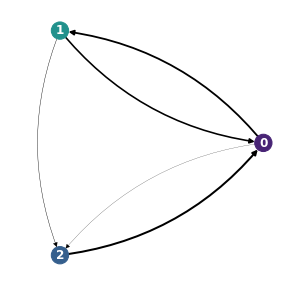

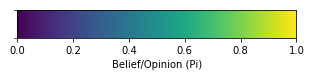

In [4]:
# Original beliefs and trust network plot:
el.plot_trust_network(TT,p00)
# Note: the arrow points from node i to node j if i pays attention to what j believes

 Each "period" will be a round of communication in which beliefs are averaged according to the trust network.

After 3 rounds the beliefs for thus example are:

[0.136 0.404 0.48 ]


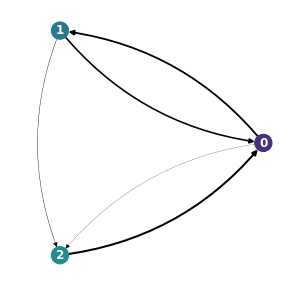

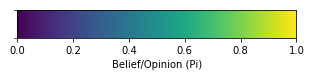

In [5]:
# Look how beliefs have changed after 2 rounds, 1's beliefs have gone down and 2's have gone up

p4 = el.beliefs_at_time(TT,p00,2)
print(p4)
el.plot_trust_network(TT,p4)

In [6]:
final_time, final_beliefs = el.time_to_convergence(TT,p00,final_beliefs=True,tolerance=0.0001)

In [7]:
print('It took %s rounds for beliefs to converge' % final_time)

It took 35 rounds for beliefs to converge


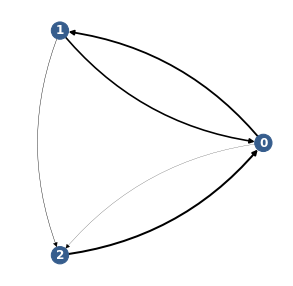

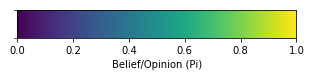

In [8]:
el.plot_trust_network(TT,final_beliefs)

In the above network, agent 0 has very low beliefs and strong influence. What happens if we change it's starting beliefs?

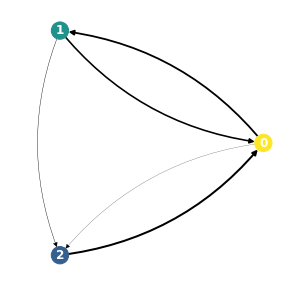

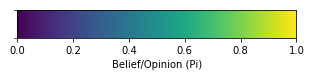

It took 35 rounds for beliefs to converge
Final beleifs:  [0.70364555 0.70368675 0.70370134]


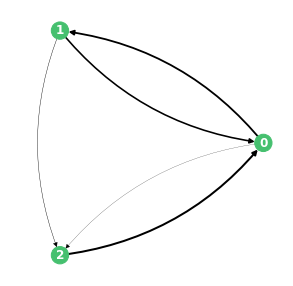

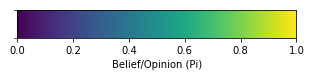

In [9]:
p01 = [1,.5,.3]
el.plot_trust_network(TT,p01)
final_time, final_beliefs = el.time_to_convergence(TT,p01,final_beliefs=True,tolerance=0.0001)

print('It took %s rounds for beliefs to converge' % final_time)
print('Final beleifs: ', final_beliefs)
el.plot_trust_network(TT,final_beliefs)


### Erdos Renyi Example

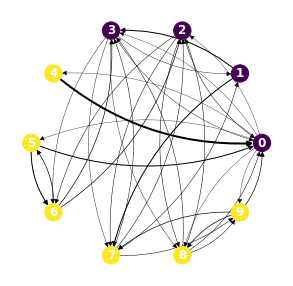

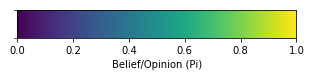

In [11]:
# Erdos Renyi network
N = 10
p0 = [0,0,0,0,
      1,1,1,1,1,1]
G = nx.erdos_renyi_graph(N,p=.333,directed=False,seed=222)

# These lines of code generate a trust network based on this graph
# and ensure the trust matrix is row stochastic
A = nx.adjacency_matrix(G).todense()
T = A/np.maximum(A.sum(axis=1),1)
T[:,-1]=T[:,-1]+np.ones((N,1))-T.sum(axis=1)

el.plot_trust_network(T,p0)


t:  2 beliefs:  [0.46111111 0.425      0.375      0.4        0.66666667 0.5
 0.61666667 0.62916667 0.67083333 0.38888889]


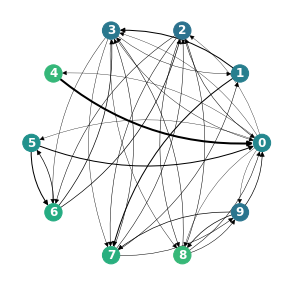

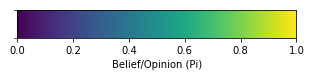

t:  5 beliefs:  [0.47313593 0.50640625 0.55351659 0.53859105 0.52471451 0.54467207
 0.44781636 0.44857253 0.46002894 0.54981224]


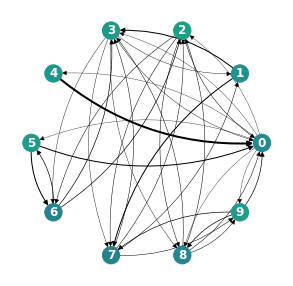

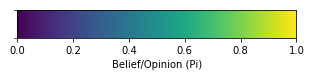

t:  10 beliefs:  [0.51691106 0.49958218 0.47978779 0.48394369 0.48038436 0.47628215
 0.52366675 0.51622031 0.51117457 0.48232374]


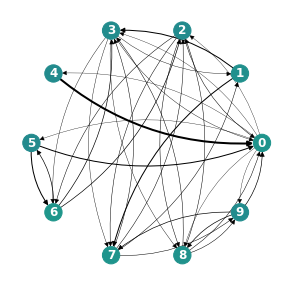

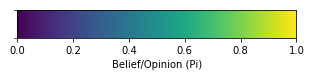

In [10]:

for t in [2,5,10]:
    pint = el.beliefs_at_time(T,p0,t)
    print('t: ', t, 'beliefs: ', pint)
    el.plot_trust_network(T,pint)




It took 52 rounds for beliefs to converge
Final beleifs:  [0.50001392 0.50000015 0.49998387 0.49998706 0.49998351 0.49998036
 0.50001924 0.50001268 0.5000086  0.4999861 ]


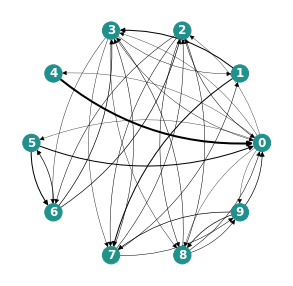

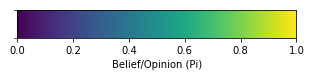

In [11]:
final_time, final_beliefs = el.time_to_convergence(T,p0,final_beliefs=True,tolerance=0.0001,max_iter=20000)

print('It took %s rounds for beliefs to converge' % final_time)
print('Final beleifs: ', final_beliefs)
el.plot_trust_network(T,final_beliefs)